In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 100)

# 1. Load and Split `train.csv`

In [2]:
train = pd.read_csv('../data/train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
# Split -train- into -training- and -validation- (to avoid data leakage)
training, validation = train_test_split(train, stratify=train['Transported'], test_size=0.2, random_state=42)

In [4]:
print(training.shape)
print(validation.shape)

(6954, 14)
(1739, 14)


In [5]:
training.to_csv('../data/training.csv', index=False)
validation.to_csv('../data/validation.csv', index=False) # aside until model validation

# 2. Dataset Overview

In [6]:
df = training.copy()
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3600,3868_04,Earth,False,G/630/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Harrie Braymon,True
1262,1336_01,Earth,True,G/201/S,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8612,9193_01,Earth,NaN,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Camily Howence,False
5075,5422_01,Europa,True,D/164/S,55 Cancri e,26.0,False,0.0,0.0,0.0,NaN,0.0,Pleion Sperap,True
4758,5076_01,Earth,False,G/818/P,TRAPPIST-1e,13.0,False,0.0,0.0,60.0,1.0,5147.0,Alicey Wolferguson,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 3600 to 7925
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6785 non-null   object 
 2   CryoSleep     6786 non-null   object 
 3   Cabin         6793 non-null   object 
 4   Destination   6801 non-null   object 
 5   Age           6815 non-null   float64
 6   VIP           6796 non-null   object 
 7   RoomService   6809 non-null   float64
 8   FoodCourt     6800 non-null   float64
 9   ShoppingMall  6785 non-null   float64
 10  Spa           6804 non-null   float64
 11  VRDeck        6810 non-null   float64
 12  Name          6795 non-null   object 
 13  Transported   6954 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 767.4+ KB


- All columns have **missing values**.

In [8]:
categorical_columns = df.select_dtypes(exclude=np.number).columns
for column in categorical_columns:
    print(f"({df[column].nunique()}) unique values in '{column}':  {df[column].unique()}\n")

(6954) unique values in 'PassengerId':  ['3868_04' '1336_01' '9193_01' ... '7579_01' '0460_01' '8462_01']

(3) unique values in 'HomePlanet':  ['Earth' 'Europa' 'Mars' nan]

(2) unique values in 'CryoSleep':  [False True nan]

(5435) unique values in 'Cabin':  ['G/630/S' 'G/201/S' 'G/1483/S' ... 'G/1229/S' 'G/65/S' 'F/1629/S']

(3) unique values in 'Destination':  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

(2) unique values in 'VIP':  [False True nan]

(6783) unique values in 'Name':  ['Harrie Braymon' nan 'Camily Howence' ... 'Willy Curton'
 'Shawne Jenningley' 'Maen Klindsey']

(2) unique values in 'Transported':  [ True False]



- We need to perform `Feature Extraction` on 'PassengerId', 'Cabin', 'Name'.

In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6815.000000,6809.000000,6800.000000,6785.000000,6804.000000,6810.000000
mean,28.683786,230.149508,452.611176,170.033604,308.868460,296.649927
std,14.497439,676.338160,1602.465410,548.753286,1142.118125,1108.581827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,50.000000,65.500000,23.000000,55.000000,42.000000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,20336.000000


- It seems that all amenity columns have **outliers**.

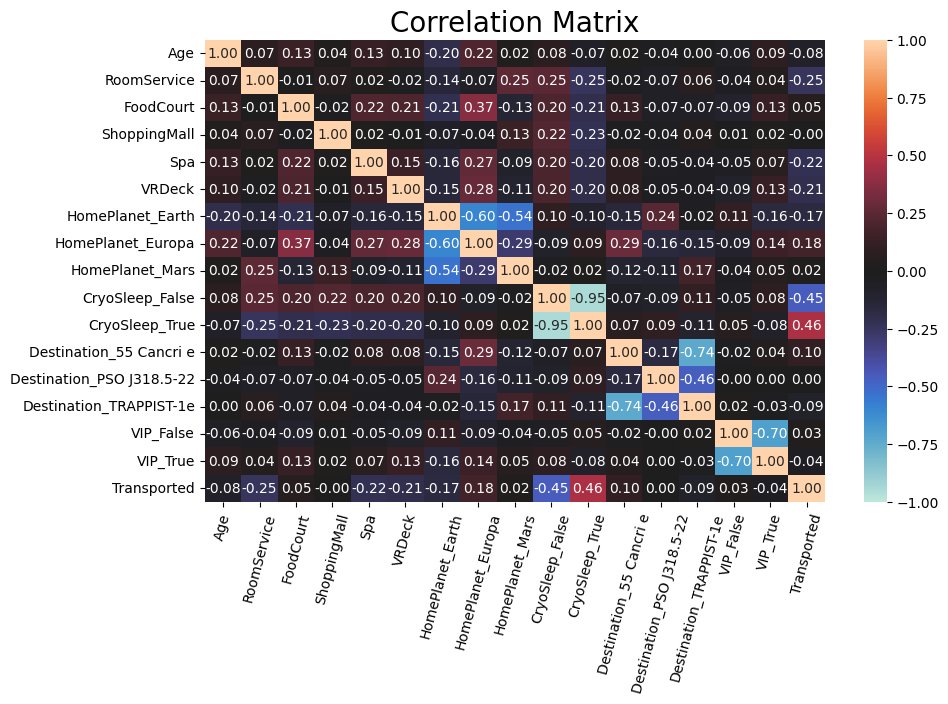

In [18]:
df_corr_matrix = df.drop(columns=['PassengerId', 'Cabin', 'Name']) # Drop columns with many unique values
df_corr_matrix = pd.get_dummies(df_corr_matrix)
df_corr_matrix['Transported'] = df_corr_matrix.pop('Transported') # Move 'Transported' to the last position
df_corr_matrix = df_corr_matrix.corr()

plt.figure(figsize=(10,6))
sns.heatmap(df_corr_matrix, annot=True, fmt=".2f", cmap="icefire", vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=75)
plt.show()

- No column highly correlated with another column.
- Some columns are low correlated with the target, but we'll keep them until `Feature Engineering`.

Let's see the **Correlation Matrix** again after `Feature Extraction`.

In [11]:
df['Transported'].value_counts(normalize=True)

Transported
True     0.503595
False    0.496405
Name: proportion, dtype: float64

In [12]:
df.duplicated().sum()

np.int64(0)